In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA

In [5]:
# Load the dataset
mall_customers = pd.read_csv('Mall_Customers.csv')

In [6]:
# Display columns and first few rows
print("Mall Customers Dataset Columns:")
print(mall_customers.columns)
print("\nFirst few rows:")
print(mall_customers.head())

Mall Customers Dataset Columns:
Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

First few rows:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [7]:
# Select features for clustering
X = mall_customers[['Annual Income (k$)', 'Spending Score (1-100)']]

In [8]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
mall_customers['Cluster'] = kmeans.fit_predict(X)

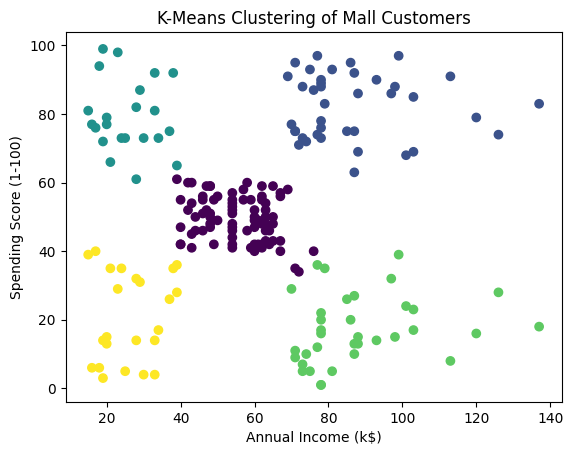

In [9]:
# Visualize the resulting clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=mall_customers['Cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering of Mall Customers')
plt.show()

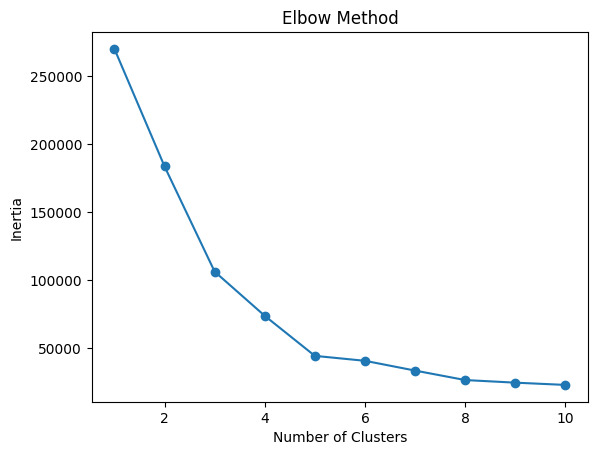

In [11]:
# Elbow Method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

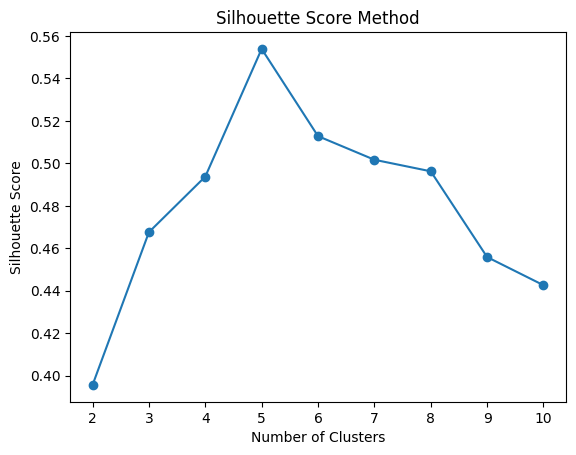

In [12]:
# Silhouette Score
silhouette_scores = []
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()

In [14]:
# Select numeric columns for profiling
numeric_columns = ['Annual Income (k$)', 'Spending Score (1-100)']

In [15]:
# Describe each cluster for numeric columns only
cluster_profile = mall_customers.groupby('Cluster')[numeric_columns].mean()
print("\nCluster Profiling:")
print(cluster_profile)


Cluster Profiling:
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


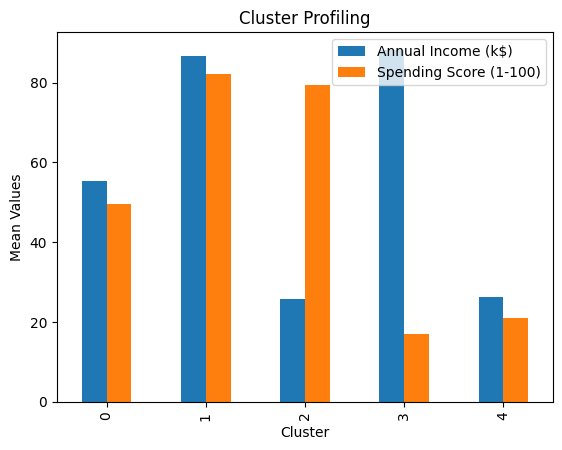

In [16]:
# Visualize cluster profiling
cluster_profile.plot(kind='bar')
plt.title('Cluster Profiling')
plt.xlabel('Cluster')
plt.ylabel('Mean Values')
plt.show()

In [18]:
# Hierarchical clustering
linked = linkage(X, method='ward')

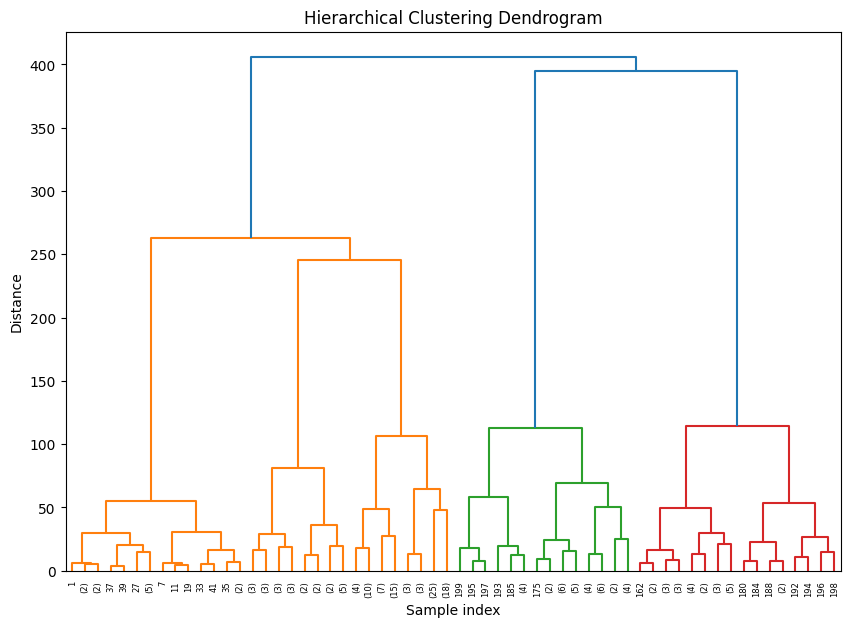

In [19]:
# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [20]:
# Cut the dendrogram to form flat clusters
mall_customers['HCluster'] = fcluster(linked, t=5, criterion='maxclust')

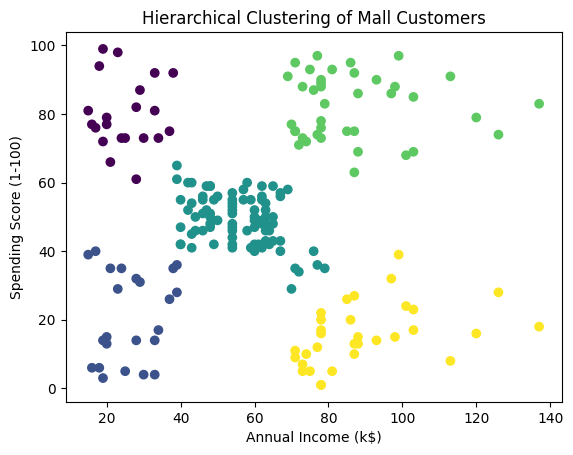

In [21]:
# Compare clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=mall_customers['HCluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Hierarchical Clustering of Mall Customers')
plt.show()

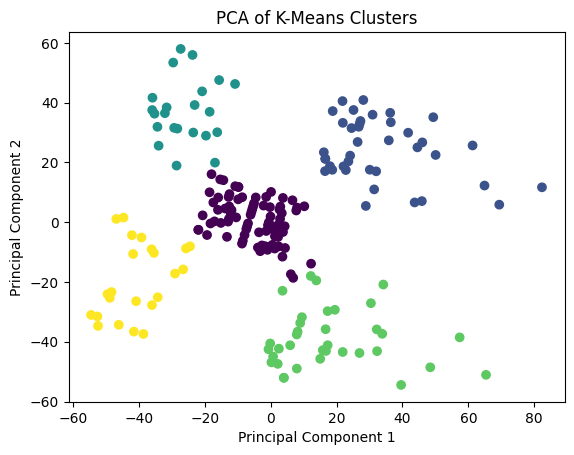

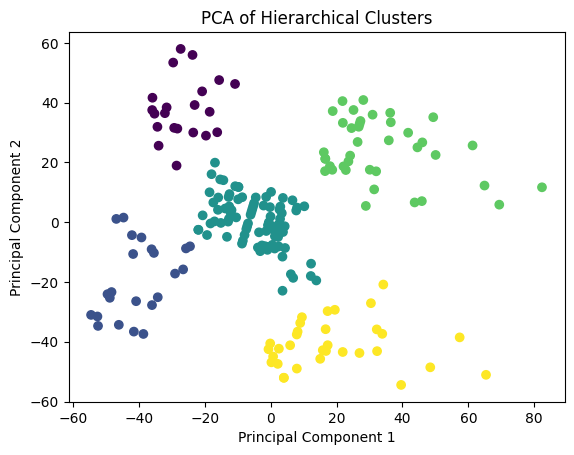

In [23]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize K-Means clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=mall_customers['Cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of K-Means Clusters')
plt.show()

# Visualize Hierarchical clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=mall_customers['HCluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Hierarchical Clusters')
plt.show()